# Sentinel 5P NO2 Data Processing Pipeline #2C

In [69]:
from s5p_no2_tools import date_from_week, add_days, nc_to_df, polygon_filter
import pandas as pd

## Using Thailand as example

In [70]:
asia0_gdf = pd.read_pickle('data/asia0_gdf.pickle')

In [71]:
country0 = asia0_gdf[asia0_gdf['name']=='Thailand']

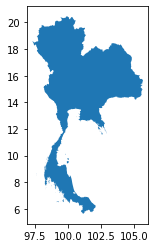

In [72]:
country0.plot()

In [73]:
bbox = pd.read_pickle(working_directory+'/bbox_gdf.pickle')

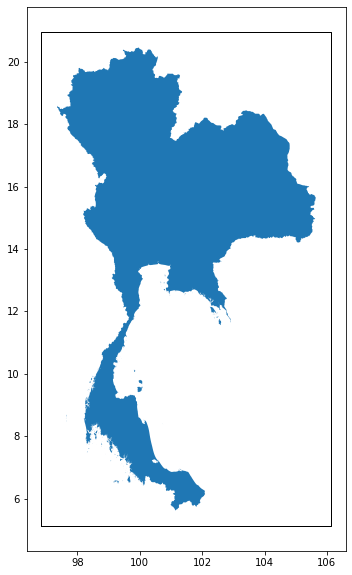

In [74]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (16,10)) 
country0.plot(ax=ax)
bbox.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 1,ax=ax)

In [75]:
week_list = ['2019-W01','2019-W06','2019-W11','2019-W17',\
             '2020-W01','2020-W06','2020-W11','2020-W17']
working_directory = 'projects/thailand'
country_file_string = 'thailand'

In [76]:
gdf_list = []
for week in week_list:
    gdf_name = 'gdf-'+week+'.pickle'
    print(gdf_name)
    gdf_list.append(pd.read_pickle(working_directory+'/'+gdf_name))

gdf-2019-W01.pickle
gdf-2019-W06.pickle
gdf-2019-W11.pickle
gdf-2019-W17.pickle
gdf-2020-W01.pickle
gdf-2020-W06.pickle
gdf-2020-W11.pickle
gdf-2020-W17.pickle


In [77]:
gdf_list[0]

,index,beginposition,crs,downloadurl,endposition,filename,footprint,format,identifier,ingestiondate,...,processingmodeabbreviation,processorversion,producttype,producttypedescription,revisionnumber,size,uuid,startdate,enddate,geometry
0,0,2019-01-16 05:41:41,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2019-01-16 06:40:04,S5P_OFFL_L2__NO2____20190116T052006_20190116T0...,"MULTIPOLYGON (((-180 -85.05115, -11.3853749188...",netCDF,S5P_OFFL_L2__NO2____20190116T052006_20190116T0...,2019-01-28T17:36:39.094Z,...,OFFL,010202,L2__NO2___,Nitrogen Dioxide,01,320.74 MB,bd4881a4-ccef-4a16-9894-8c83527cfbe9,2019-01-16,2019-01-16,"POLYGON ((96.84545 5.11607, 106.13860 5.11607,..."
1,1,2019-01-15 06:00:39,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2019-01-15 06:59:03,S5P_OFFL_L2__NO2____20190115T053905_20190115T0...,"MULTIPOLYGON (((-180 -85.05115, -15.3463509207...",netCDF,S5P_OFFL_L2__NO2____20190115T053905_20190115T0...,2019-01-27T17:05:27.252Z,...,OFFL,010202,L2__NO2___,Nitrogen Dioxide,01,320.69 MB,42f88a77-0a77-4930-820d-a57e7cd1e28c,2019-01-15,2019-01-15,"POLYGON ((96.84545 5.11607, 106.13860 5.11607,..."
2,2,2019-01-14 06:19:38,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2019-01-14 07:18:01,S5P_OFFL_L2__NO2____20190114T055803_20190114T0...,"MULTIPOLYGON (((-180 -85.05115, -19.5138567628...",netCDF,S5P_OFFL_L2__NO2____20190114T055803_20190114T0...,2019-01-26T16:35:29.65Z,...,OFFL,010202,L2__NO2___,Nitrogen Dioxide,01,319.47 MB,76122549-0199-4fd8-b4b2-43ec894636ca,2019-01-14,2019-01-14,"POLYGON ((96.84545 5.11607, 106.13860 5.11607,..."
3,3,2019-01-11 05:35:04,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2019-01-11 06:33:28,S5P_OFFL_L2__NO2____20190111T051330_20190111T0...,"MULTIPOLYGON (((-180 -85.05115, -8.06024833292...",netCDF,S5P_OFFL_L2__NO2____20190111T051330_20190111T0...,2019-01-23T16:35:29.238Z,...,OFFL,010202,L2__NO2___,Nitrogen Dioxide,01,322.64 MB,1637de17-95f5-4fe9-b078-a6645cb099a8,2019-01-11,2019-01-11,"POLYGON ((96.84545 5.11607, 106.13860 5.11607,..."
4,4,2019-01-10 05:54:04,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2019-01-10 06:46:21,S5P_OFFL_L2__NO2____20190110T053230_20190110T0...,"MULTIPOLYGON (((-180 -85.05115, -13.9387469160...",netCDF,S5P_OFFL_L2__NO2____20190110T053230_20190110T0...,2019-01-22T16:35:25.2Z,...,OFFL,010202,L2__NO2___,Nitrogen Dioxide,01,307.37 MB,02ef5af7-069f-410d-81a5-384fca8f726c,2019-01-10,2019-01-10,"POLYGON ((96.84545 5.11607, 106.13860 5.11607,..."
5,5,2019-01-09 06:13:03,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2019-01-09 07:11:27,S5P_OFFL_L2__NO2____20190109T055129_20190109T0...,"MULTIPOLYGON (((-180 -85.05115, -17.8871675966...",netCDF,S5P_OFFL_L2__NO2____20190109T055129_20190109T0...,2019-01-21T16:05:34.662Z,...,OFFL,010202,L2__NO2___,Nitrogen Dioxide,01,318.76 MB,5bd5035e-e00d-453c-972e-8304273f235a,2019-01-09,2019-01-09,"POLYGON ((96.84545 5.11607, 106.13860 5.11607,..."
6,6,2019-01-27 05:36:02,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2019-01-27 06:34:25,S5P_OFFL_L2__NO2____20190127T051428_20190127T0...,"MULTIPOLYGON (((-180 -85.05115, -8.39352264786...",netCDF,S5P_OFFL_L2__NO2____20190127T051428_20190127T0...,2019-02-08T18:36:12.075Z,...,OFFL,010202,L2__NO2___,Nitrogen Dioxide,01,319.47 MB,1d577354-a77c-415d-b8fc-467498e165b4,2019-01-27,2019-01-27,"POLYGON ((96.84545 5.11607, 106.13860 5.11607,..."
7,7,2019-01-26 05:55:00,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2019-01-26 06:53:23,S5P_OFFL_L2__NO2____20190126T053325_20190126T0...,"MULTIPOLYGON (((-180 -85.05115, -13.5714059282...",netCDF,S5P_OFFL_L2__NO2____20190126T053325_20190126T0...,2019-02-07T18:35:30.515Z,...,OFFL,010202,L2__NO2___,Nitrogen Dioxide,01,320.55 MB,36b9470a-79c6-4d95-b08f-0bcb24f5ed77,2019-01-26,2019-01-26,"POLYGON ((96.84545 5.11607, 106.13860 5.11607,..."
8,8,2019-01-25 06:13:58,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2019-01-25 07:12:21,S5P_OFFL_L2__NO2

## Concatenate all swaths as pickle filter GDF

`pickle_filter_gdf` contains all the swaths (satellite passage paths) intersecting with the polygon filter and records the `week` string.

In [78]:
%%time
import geopandas as gpd
from shapely import wkt

crs = country0.crs
pickle_filter_gdf = gpd.GeoDataFrame(crs=crs)
country0_sindex = country0.sindex
for i in range(0, len(gdf_list)):
    print('========================')
    print('Processing GeoDataFrame #'+str(i+1)+'...')
    gdf_list[i].crs = crs
    numrecords = len(gdf_list[i])
    if len(pickle_filter_gdf)==0:
        print('initializing pickle_filter_gdf...')
        pickle_filter_gdf = gdf_list[i][0:0]
        pickle_filter_gdf['week'] = ''
    if numrecords > 0:
        print('appending gdf_list[i] to pickle_filter_gdf...')
        week_name = week_list[i]
        print('week name:', week_name)
        gdf_list[i]['week'] = week_name
        pickle_filter_gdf = gpd.GeoDataFrame(pd.concat([pickle_filter_gdf, gdf_list[i]], ignore_index=True) )

Processing GeoDataFrame #1...
initializing pickle_filter_gdf...
appending gdf_list[i] to pickle_filter_gdf...
week name: 2019-W01
Processing GeoDataFrame #2...
appending gdf_list[i] to pickle_filter_gdf...
week name: 2019-W06
Processing GeoDataFrame #3...
appending gdf_list[i] to pickle_filter_gdf...
week name: 2019-W11
Processing GeoDataFrame #4...
appending gdf_list[i] to pickle_filter_gdf...
week name: 2019-W17
Processing GeoDataFrame #5...
appending gdf_list[i] to pickle_filter_gdf...
week name: 2020-W01
Processing GeoDataFrame #6...
appending gdf_list[i] to pickle_filter_gdf...
week name: 2020-W06
Processing GeoDataFrame #7...
appending gdf_list[i] to pickle_filter_gdf...
week name: 2020-W11
Processing GeoDataFrame #8...
appending gdf_list[i] to pickle_filter_gdf...
week name: 2020-W17
CPU times: user 40.1 ms, sys: 1e+03 ns, total: 40.1 ms
Wall time: 37.5 ms


## NO2 pickle files to use filtered by country polygon

In [79]:
pickle_filter_gdf

,index,beginposition,crs,downloadurl,endposition,filename,footprint,format,identifier,ingestiondate,...,processorversion,producttype,producttypedescription,revisionnumber,size,uuid,startdate,enddate,geometry,week
0,0,2019-01-16 05:41:41,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2019-01-16 06:40:04,S5P_OFFL_L2__NO2____20190116T052006_20190116T0...,"MULTIPOLYGON (((-180 -85.05115, -11.3853749188...",netCDF,S5P_OFFL_L2__NO2____20190116T052006_20190116T0...,2019-01-28T17:36:39.094Z,...,010202,L2__NO2___,Nitrogen Dioxide,01,320.74 MB,bd4881a4-ccef-4a16-9894-8c83527cfbe9,2019-01-16,2019-01-16,"POLYGON ((96.84545 5.11607, 106.13860 5.11607,...",2019-W01
1,1,2019-01-15 06:00:39,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2019-01-15 06:59:03,S5P_OFFL_L2__NO2____20190115T053905_20190115T0...,"MULTIPOLYGON (((-180 -85.05115, -15.3463509207...",netCDF,S5P_OFFL_L2__NO2____20190115T053905_20190115T0...,2019-01-27T17:05:27.252Z,...,010202,L2__NO2___,Nitrogen Dioxide,01,320.69 MB,42f88a77-0a77-4930-820d-a57e7cd1e28c,2019-01-15,2019-01-15,"POLYGON ((96.84545 5.11607, 106.13860 5.11607,...",2019-W01
2,2,2019-01-14 06:19:38,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2019-01-14 07:18:01,S5P_OFFL_L2__NO2____20190114T055803_20190114T0...,"MULTIPOLYGON (((-180 -85.05115, -19.5138567628...",netCDF,S5P_OFFL_L2__NO2____20190114T055803_20190114T0...,2019-01-26T16:35:29.65Z,...,010202,L2__NO2___,Nitrogen Dioxide,01,319.47 MB,76122549-0199-4fd8-b4b2-43ec894636ca,2019-01-14,2019-01-14,"POLYGON ((96.84545 5.11607, 106.13860 5.11607,...",2019-W01
3,3,2019-01-11 05:35:04,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2019-01-11 06:33:28,S5P_OFFL_L2__NO2____20190111T051330_20190111T0...,"MULTIPOLYGON (((-180 -85.05115, -8.06024833292...",netCDF,S5P_OFFL_L2__NO2____20190111T051330_20190111T0...,2019-01-23T16:35:29.238Z,...,010202,L2__NO2___,Nitrogen Dioxide,01,322.64 MB,1637de17-95f5-4fe9-b078-a6645cb099a8,2019-01-11,2019-01-11,"POLYGON ((96.84545 5.11607, 106.13860 5.11607,...",2019-W01
4,4,2019-01-10 05:54:04,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2019-01-10 06:46:21,S5P_OFFL_L2__NO2____20190110T053230_20190110T0...,"MULTIPOLYGON (((-180 -85.05115, -13.9387469160...",netCDF,S5P_OFFL_L2__NO2____20190110T053230_20190110T0...,2019-01-22T16:35:25.2Z,...,010202,L2__NO2___,Nitrogen Dioxide,01,307.37 MB,02ef5af7-069f-410d-81a5-384fca8f726c,2019-01-10,2019-01-10,"POLYGON ((96.84545 5.11607, 106.13860 5.11607,...",2019-W01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,5,2020-05-09 06:11:55,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-05-09 07:10:19,S5P_OFFL_L2__NO2____20200509T055021_20200509T0...,"MULTIPOLYGON (((91.45561 -82.48603, 111.46893 ...",netCDF,S5P_OFFL_L2__NO2____20200509T055021_20200509T0...,2020-05-18T18:07:03.903Z,...,010302,L2__NO2___,Nitrogen Dioxide,01,436.06 MB,fd068ea4-3af4-4664-8d2d-5592e851cacf,2020-05-09,2020-05-09,"POLYGON ((96.84545 5.11607, 106.13860 5.11607,...",2020-W17
84,6,2020-04-28 06:17:22,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-04-28 07:15:46,S5P_OFFL_L2__NO2____20200428T055548_20200428T0...,"MULTIPOLYGON (((70.78801025320689 -85.05115, 1...",netCDF,S5P_OFFL_L2__NO2____20200428T055548_20200428T0...,2020-05-08T05:05:32.382Z,...,010302,L2__NO2___,Nitrogen Dioxide,01,438.8 MB,dd046e8b-69b9-423e-a7de-ca2586ad1177,2020-04-28,2020-04-28,"POLYGON ((96.84545 5.11607, 106.13860 5.11607,...",2020-W17
85,7,2020-05-08 06:30:53,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-05-08 07:29:16,S5P_OFFL_L2__NO2____20200508T060918_20200508T0...,"MULTIPOLYGON (((86.13476 -82.72399, 106.826836...",netCDF,S5P_OFFL_L2__NO2____20200508T060918_20200508T0...,2020-05-17T16:05:41.436Z,...,010302,L2__NO2___,Nitrogen Dioxide,01,437.98 MB,b4e1f592-6e8a-4917-8217-d2f29911c46c,2020-05-08,2020-05-08,"POLYGON ((96.84545 5.11607, 106.13860 5.11607,...",2020-W17
86,8,2020-05-14 06:1

## Create subset NO2 dataframes clipped by target place polygon

This section creates a subset of TROPOMI NO2 dataframes clipped by the polygon of target place and selected from swaths intersecting with the target place polygon.

In [82]:
%%time
import time

file_list = []
prev_week = ''
filter_polygon_gdf = bbox
filter_polygon_sindex = filter_polygon_gdf.sindex
clip_stats_df = pd.DataFrame()
for week in week_list:
    tic1 = time.perf_counter()
    if prev_week != week:
        country_files_gdf = gpd.GeoDataFrame()
    filter_filename = working_directory+'/'+country_file_string+'-'+week+'_gdf.pickle'
    file_list.append(filter_filename)
    print('\n\nweek:', week)
    i=1
    for index, row in pickle_filter_gdf[pickle_filter_gdf['week']==week].iterrows():
        tic2 = time.perf_counter()
        print('row:', i)
        identifier = row['identifier']
        print('reading pickle file for ', identifier)
        input_df = pd.read_pickle('projects/swaths/'+identifier+'.pickle')
        input_df['week'] = week
        gdf = polygon_filter(input_df=input_df, filter_gdf=filter_polygon_gdf)
        # identifier connects NO2 records to the source swath 
        gdf['identifier'] = identifier
        if len(country_files_gdf) == 0:
            country_files_gdf = gdf[0:0]
        
        country_files_gdf = gpd.GeoDataFrame(pd.concat([country_files_gdf, gdf]), crs=crs)
        i = i + 1
        toc2 = time.perf_counter()
        elapsed_time2 = toc2-tic2
        clip_stats_dict = {'week': week, 'input_rows': len(input_df), 'output_rows': len(gdf),\
                           'elapsed_time_sec':elapsed_time2}
    clip_stats_df = clip_stats_df.append([clip_stats_dict], ignore_index=True)
    print('saving as filter_filename:', filter_filename)
    country_files_gdf.to_pickle(filter_filename)
    toc1 = time.perf_counter()
    elapsed_time1 = toc1-tic1
    print('Processing time for week '+week+', minutes: '+str(elapsed_time1/60))
    prev_week = week



week: 2019-W01
row: 1
reading pickle file for  S5P_OFFL_L2__NO2____20190116T052006_20190116T070136_06524_01_010202_20190122T144549
Processing input dataframe...
Original NO2 DataFrame length: 1460250
Filtered NO2 GeoDataFrame length: 49743
Processed NO2 DataFrame sjoin in 0.9522324876859785 minutes
row: 2
reading pickle file for  S5P_OFFL_L2__NO2____20190115T053905_20190115T072035_06510_01_010202_20190121T074735
Processing input dataframe...
Original NO2 DataFrame length: 1460250
Filtered NO2 GeoDataFrame length: 58884
Processed NO2 DataFrame sjoin in 0.9135400671667109 minutes
row: 3
reading pickle file for  S5P_OFFL_L2__NO2____20190114T055803_20190114T073934_06496_01_010202_20190120T080017
Processing input dataframe...
Original NO2 DataFrame length: 1460250
Filtered NO2 GeoDataFrame length: 42795
Processed NO2 DataFrame sjoin in 0.9215769708311806 minutes
row: 4
reading pickle file for  S5P_OFFL_L2__NO2____20190111T051330_20190111T065501_06453_01_010202_20190117T072330
Processing i

Filtered NO2 GeoDataFrame length: 42909
Processed NO2 DataFrame sjoin in 0.9051515123030792 minutes
row: 6
reading pickle file for  S5P_OFFL_L2__NO2____20190406T052803_20190406T070933_07659_01_010300_20190412T071021
Processing input dataframe...
Original NO2 DataFrame length: 1460250
Filtered NO2 GeoDataFrame length: 49515
Processed NO2 DataFrame sjoin in 0.9239021428084622 minutes
row: 7
reading pickle file for  S5P_OFFL_L2__NO2____20190405T054658_20190405T072829_07645_01_010300_20190411T142228
Processing input dataframe...
Original NO2 DataFrame length: 1460250
Filtered NO2 GeoDataFrame length: 58935
Processed NO2 DataFrame sjoin in 0.9114182348207881 minutes
row: 8
reading pickle file for  S5P_OFFL_L2__NO2____20190404T060554_20190404T074724_07631_01_010300_20190410T075015
Processing input dataframe...
Original NO2 DataFrame length: 1460700
Filtered NO2 GeoDataFrame length: 43012
Processed NO2 DataFrame sjoin in 0.9110339919570833 minutes
row: 9
reading pickle file for  S5P_OFFL_L2__



week: 2020-W06
row: 1
reading pickle file for  S5P_OFFL_L2__NO2____20200215T051558_20200215T065728_12128_01_010302_20200218T101642
Processing input dataframe...
Original NO2 DataFrame length: 1877850
Filtered NO2 GeoDataFrame length: 54979
Processed NO2 DataFrame sjoin in 1.1695250422072907 minutes
row: 2
reading pickle file for  S5P_OFFL_L2__NO2____20200219T054145_20200219T072316_12185_01_010302_20200222T102445
Processing input dataframe...
Original NO2 DataFrame length: 1877850
Filtered NO2 GeoDataFrame length: 75687
Processed NO2 DataFrame sjoin in 1.1754838678520172 minutes
row: 3
reading pickle file for  S5P_OFFL_L2__NO2____20200218T060041_20200218T074211_12171_01_010302_20200221T103912
Processing input dataframe...
Original NO2 DataFrame length: 1877400
Filtered NO2 GeoDataFrame length: 54903
Processed NO2 DataFrame sjoin in 1.1733575745485723 minutes
row: 4
reading pickle file for  S5P_OFFL_L2__NO2____20200220T052250_20200220T070420_12199_01_010302_20200223T100534
Processing i

Filtered NO2 GeoDataFrame length: 71404
Processed NO2 DataFrame sjoin in 1.165858120797202 minutes
row: 6
reading pickle file for  S5P_OFFL_L2__NO2____20200509T055021_20200509T073151_13320_01_010302_20200511T121907
Processing input dataframe...
Original NO2 DataFrame length: 1877850
Filtered NO2 GeoDataFrame length: 75736
Processed NO2 DataFrame sjoin in 1.1747117744913946 minutes
row: 7
reading pickle file for  S5P_OFFL_L2__NO2____20200428T055548_20200428T073718_13164_01_010302_20200429T224121
Processing input dataframe...
Original NO2 DataFrame length: 1877400
Filtered NO2 GeoDataFrame length: 71711
Processed NO2 DataFrame sjoin in 1.1652915324394901 minutes
row: 8
reading pickle file for  S5P_OFFL_L2__NO2____20200508T060918_20200508T075049_13306_01_010302_20200509T224732
Processing input dataframe...
Original NO2 DataFrame length: 1877400
Filtered NO2 GeoDataFrame length: 55130
Processed NO2 DataFrame sjoin in 1.1772396109998227 minutes
row: 9
reading pickle file for  S5P_OFFL_L2__N

In [83]:
clip_stats_df['clip_fraction'] = clip_stats_df['output_rows']/clip_stats_df['input_rows']
clip_stats_df

,week,input_rows,output_rows,elapsed_time_sec,clip_fraction
0,2019-W01,1460700,55562,58.014388,0.038038
1,2019-W06,1307700,55545,52.076255,0.042475
2,2019-W11,1460700,50183,57.899649,0.034355
3,2019-W17,1460700,58658,58.173120,0.040157
4,2020-W01,1877850,55055,73.581248,0.029318
5,2020-W06,1877850,71597,75.202803,0.038127
6,2020-W11,1877400,71613,74.218137,0.038145
7,2020-W17,1877400,71314,73.750049,0.037986


In [84]:
pickle_filter_gdf.to_pickle(working_directory+'/'+country_file_string+'_files_gdf.pickle')

In [85]:
file_list

['projects/thailand/thailand-2019-W01_gdf.pickle',
 'projects/thailand/thailand-2019-W06_gdf.pickle',
 'projects/thailand/thailand-2019-W11_gdf.pickle',
 'projects/thailand/thailand-2019-W17_gdf.pickle',
 'projects/thailand/thailand-2020-W01_gdf.pickle',
 'projects/thailand/thailand-2020-W06_gdf.pickle',
 'projects/thailand/thailand-2020-W11_gdf.pickle',
 'projects/thailand/thailand-2020-W17_gdf.pickle']

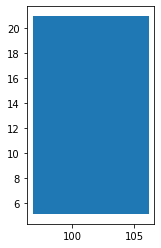

In [86]:
pickle_filter_gdf.plot()

After this notebook, you may run the [`Pipeline 2D notebook`](./NB07-Processing-Pipeline-2D.ipynb).